# Machine Learning with support vector machine with radial basis gaussian kernel- Himanshu Bhardwaj

**An Application to lithologies prediction with geophysical logs**

**Introduction**

If we want to predict lithologies by considering only one or very few geophysical logs, we can use a very import machine learning tool called support vector machine with radial basis gaussian kernel. A radial basis gausian kernel can be used to transform one dimensional dataset to multidimensional dataset by adding more and more features and hence, increases the predictability of the support vector machine. The radial basis gaussian kernel is given by:

$$\phi\gamma(x,l) = exp(-\gamma||x-l||^2)$$

**How support vector machine classifies the dataset ?**

Support vector machine is used to classify n-dimensional datasets by drawing decison  boundary that can segregate datsets into classes. The best decision boundary is called hyperplane.

!['support vector machine'](SVM_works.png)

**By adding features using a radial basis gaussian kernel, we can convert one dimensional dataset into multi-dimensional datasets and make it possible to draw hyperplanes, which was not possible in earlier case**

!['gaussian kernel'](gaussian.png)

**Description of Logs:**

1. GR: Natural Gamma Ray log (API)
2. PEF: Photoelectric factor (barns/sec)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,GR,NPHI,DPHI,PEF,PICK,TRUE
0,18.4445,0.1263,0.0973,2.5341,7,7
1,18.4814,0.1138,0.0882,2.5683,7,7
2,17.9632,0.1100,0.0890,2.5396,7,7
3,16.0150,0.1213,0.1170,2.3682,7,7
4,14.6361,0.1112,0.1520,2.1106,10,10


In [6]:
lith = pd.read_csv('Lithology.csv')
lith.columns = ['TRUE', 'Lithology']
lith.head()

,TRUE,Lithology
0,2,Halite
1,3,Gypsum
2,4,Dolomite
3,5,Dolomitic Limestone
4,6,Cherty Dolomitic Limestone


In [7]:
dt = df.merge(lith, on='TRUE')
dt.head()

,GR,NPHI,DPHI,PEF,PICK,TRUE,Lithology
0,18.4445,0.1263,0.0973,2.5341,7,7,Cherty Dolomite
1,18.4814,0.1138,0.0882,2.5683,7,7,Cherty Dolomite
2,17.9632,0.1100,0.0890,2.5396,7,7,Cherty Dolomite
3,16.0150,0.1213,0.1170,2.3682,7,7,Cherty Dolomite
4,17.4286,0.0877,0.0846,2.3734,7,7,Cherty Dolomite


**Exploratory data analysis**

<AxesSubplot:xlabel='Lithology', ylabel='GR'>

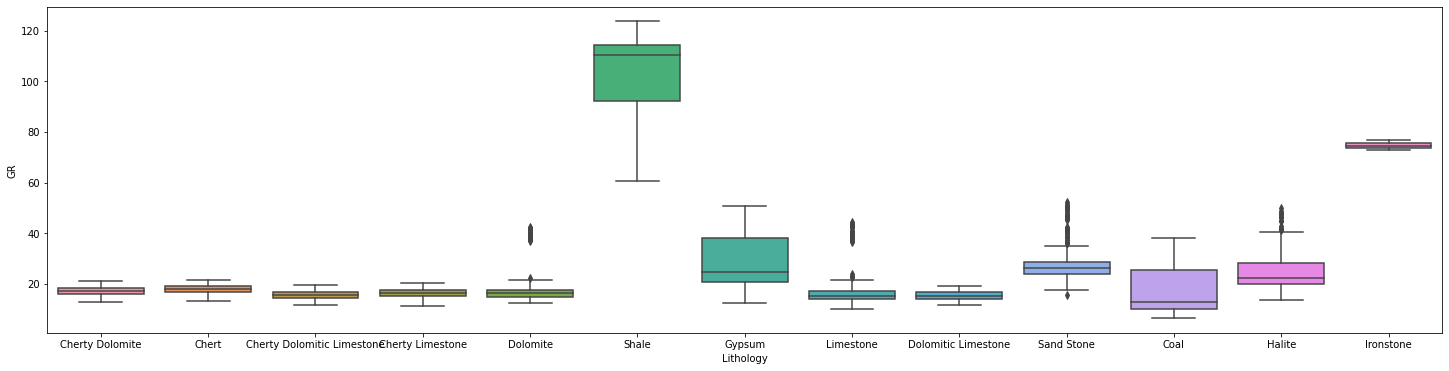

In [10]:
plt.figure(figsize=(25,6))
sns.boxplot(x = 'Lithology', y = 'GR', data=dt)

<AxesSubplot:xlabel='Lithology', ylabel='PEF'>

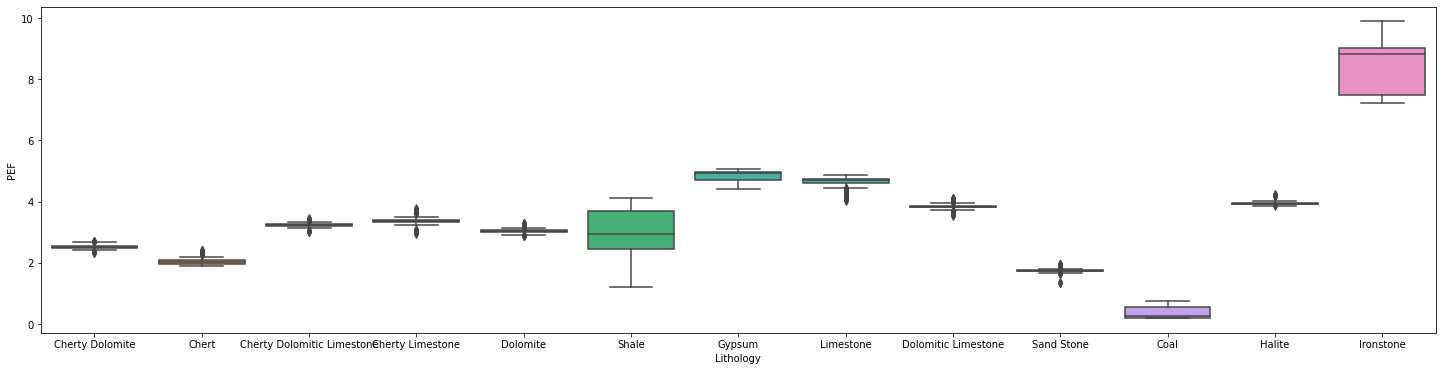

In [12]:
plt.figure(figsize=(25,6))
sns.boxplot(x = 'Lithology', y = 'PEF', data=dt)

In [39]:
d1 = dt[(dt['Lithology']=='Shale')|(dt['Lithology']=='Sand Stone')|(dt['Lithology']=='Limestone')]
d2 = dt[(dt['Lithology']=='Shale')|(dt['Lithology']=='Sand Stone')]

<Figure size 648x360 with 0 Axes>

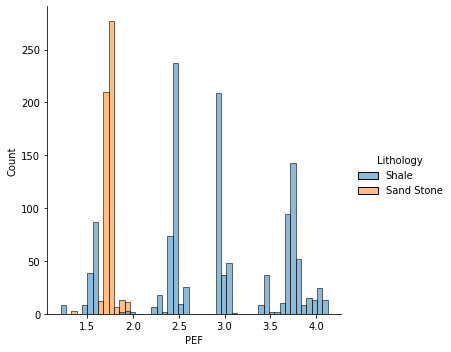

In [40]:
plt.figure(figsize=(9,5))
sns.displot(x='PEF', hue='Lithology', data=d2, bins=50)

<Figure size 648x360 with 0 Axes>

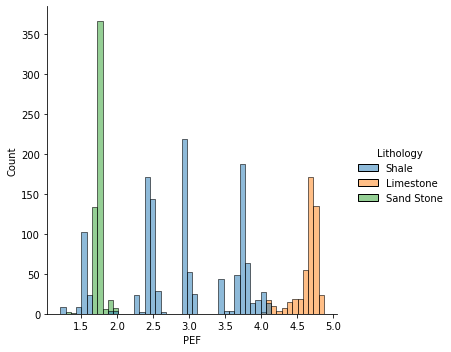

In [34]:
plt.figure(figsize=(9,5))
sns.displot(x='PEF', hue='Lithology', data=d1, bins=50)

<Figure size 648x360 with 0 Axes>

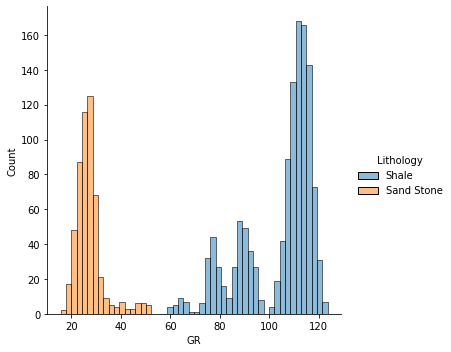

In [41]:
plt.figure(figsize=(9,5))
sns.displot(x='GR', hue='Lithology', data=d2, bins=50)

<Figure size 648x360 with 0 Axes>

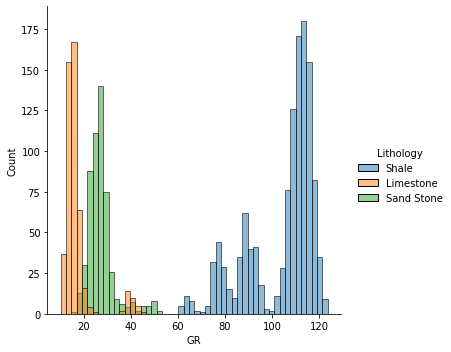

In [35]:
plt.figure(figsize=(9,5))
sns.displot(x='GR', hue='Lithology', data=d1, bins=50)

<AxesSubplot:xlabel='GR', ylabel='PEF'>

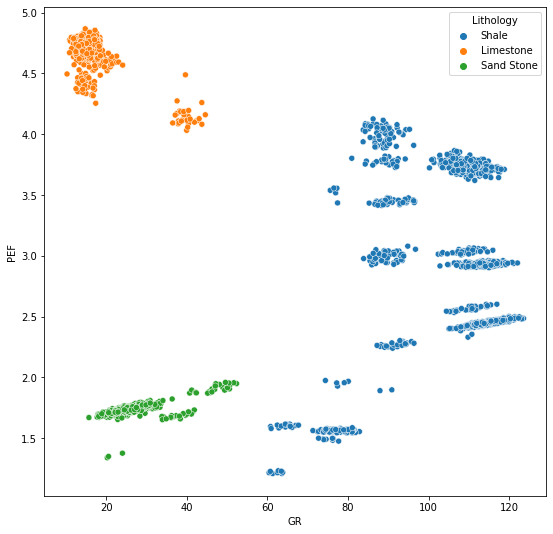

In [38]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='GR', y='PEF', data=d1, hue='Lithology')

**Observation**

Photo electric formation factor log (PEF) can separate various lithologies except Shale and Sand Stone, whereas, Shale and Sand Stone lithologies are well separated by Natural Gamma log. Therefore, These two logs have been considered for classifying logs into various lithologies.

**Machine learning with Support vector machine (SVM) with radial basis gaussian function for Lithologies classification using Natural Gamma (NG) and Photo Electric formation factor logs (PEF)**

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

In [44]:
slt = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=100)

In [45]:
train = []
test = []
for train_idx, test_idx in slt.split(dt, dt['TRUE']):
    train.append(dt.loc[train_idx])
    test.append(dt.loc[test_idx])

In [48]:
xtrn = train[-1]
xtst = test[-1]

In [49]:
train_X = xtrn[['PEF', 'GR']]
test_X = xtst[['PEF', 'GR']]

In [57]:
train_Y = xtrn['TRUE']
test_Y = xtst['TRUE']

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [56]:
rbf = Pipeline((("scaler", StandardScaler()),("clf", SVC(kernel="rbf", gamma=5, C=1000))))

In [58]:
rbf.fit(train_X, train_Y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [59]:
test_predict = rbf.predict(test_X)

In [61]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 648x648 with 0 Axes>

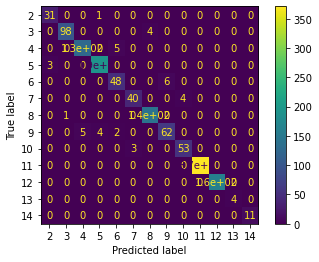

In [65]:
plt.figure(figsize=(9,9))
plot_confusion_matrix(rbf, test_X, test_Y)

**Let us the trained model to predict lithologies**

In [70]:
df = pd.read_csv('file1046462289.csv')
df.head()

,Depth,CGXT,SMTU,GRGC,SPCG,FEFE,NPRL,CLDC,DCOR,DEN,...,MNRL,MINV,MBTC,HVOL,AVOL,CTAO,R40O,R60O,RTAO,BIT
0,1699.0,-999.25,-999.25,74.655273,342.755129,0.066587,-999.25,8.090829,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117137,0.063007,0.797272,1254.277906,1254.277906,1254.277906,-999.25
1,1699.5,-999.25,-999.25,67.210760,342.312016,0.065862,-999.25,8.090769,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117137,0.063007,0.801656,1247.437483,1247.437483,1247.437483,-999.25
2,1700.0,-999.25,-999.25,61.085746,341.922004,0.065413,-999.25,8.090793,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117137,0.063007,0.804623,1242.818044,1242.818044,1242.818044,-999.25
3,1700.5,-999.25,-999.25,58.320451,341.325809,0.065129,-999.25,8.090767,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117136,0.063006,0.806937,1239.256386,1239.256386,1239.256386,-999.25
4,1701.0,-999.25,-999.25,58.242153,340.563663,0.065534,-999.25,8.090771,-999.25,-999.25,...,-999.25,-999.25,-999.25,0.117137,0.063007,0.805297,1241.778078,1241.778078,1241.778078,-999.25


In [71]:
df.replace(-999.25, np.nan, inplace=True)

In [72]:
df = df.dropna()

In [73]:
import hemi_imp_blocking as hb

In [74]:
bl_dt = hb.block_multiple(df, ['PDPE','GRGC'])

In [75]:
bl_dt.head()

,Depth,PDPE,GRGC
0,3601.090278,3.689047,53.640365
1,3601.090278,3.689047,53.640365
2,3601.807978,3.689047,53.640365
3,3601.807978,3.781788,53.640365
2,3601.841860,3.781788,53.640365


In [76]:
bl_dt.set_index('Depth', inplace=True)

In [77]:
scale = StandardScaler()
svalue = scale.fit_transform(bl_dt[['PDPE', 'GRGC']])

In [92]:
pred = rbf.predict(bl_dt[['PDPE', 'GRGC']])

In [93]:
bl_dt['Predicted_Value'] = pred

In [82]:
Lith = lith
Lith['color_code'] = np.array(['#7ddfbe','#ff80ff', '#8080ff', '#8088ff','#88ffff','#8080ff',
                              '#80ffff','#80ffff','#ff8c00', '#bebebe','#ffe119','#7cfc00','black'])
Lith['Hatch'] = np.array(['x','||','-/','-./','./','+','.+','..','-.','..','--','//-',''])
Lith

,TRUE,Lithology,color_code,Hatch
0,2,Halite,#7ddfbe,x
1,3,Gypsum,#ff80ff,||
2,4,Dolomite,#8080ff,-/
3,5,Dolomitic Limestone,#8088ff,-./
4,6,Cherty Dolomitic Limestone,#88ffff,./
5,7,Cherty Dolomite,#8080ff,+
6,8,Limestone,#80ffff,.+
7,9,Cherty Limestone,#80ffff,..
8,10,Chert,#ff8c00,-.
9,11,Shale,#bebebe,..


In [83]:
import hemi_plot as hp

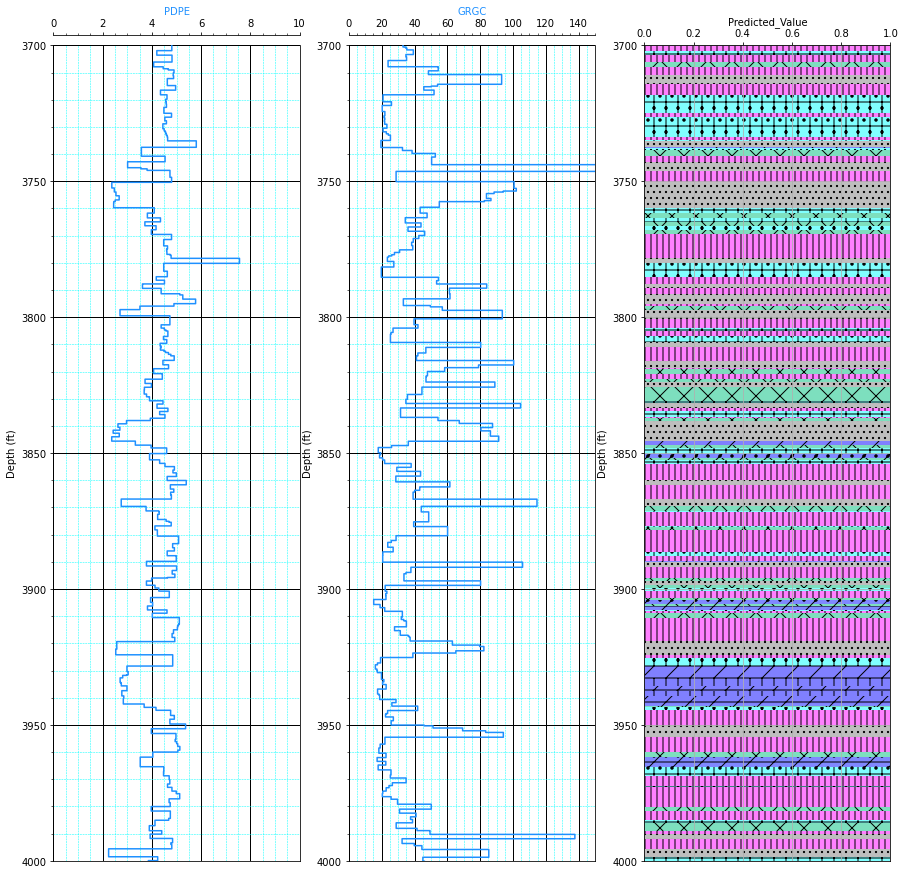

In [94]:
hp.track_plot_lith(bl_dt, track=[['PDPE'],['GRGC'], ['Predicted_Value']], depth_range=[3700, 4000], track_range=
          [[[0,10]],
              [[0,150]]],
              Lith = Lith)

**Lithology Index**

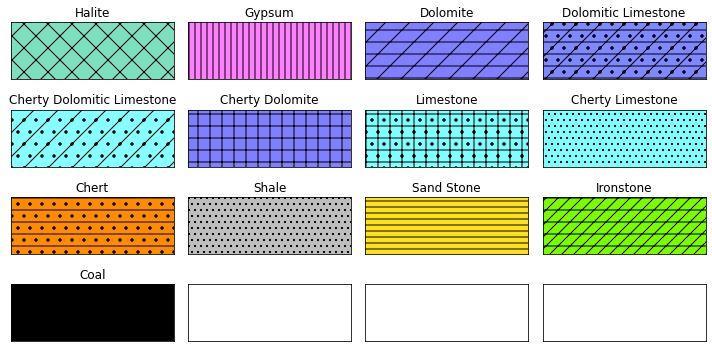

In [95]:
hp.plot_index(Lith=Lith)